# 第4回講義 宿題

## 課題. MNISTデータセットを多層パーセプトロン(MLP)で学習せよ

### 注意
- homework関数を完成させて提出してください
    - 訓練データはtrain_X, train_y, テストデータはtest_Xで与えられます
    - train_Xとtrain_yをtrain_X, train_yとvalid_X, valid_yに分けるなどしてモデルを学習させてください
    - test_Xに対して予想ラベルpred_yを作り, homework関数の戻り値としてください\
- pred_yのtest_yに対する精度(F値)で評価します
- 全体の実行時間がiLect上で60分を超えないようにしてください
- homework関数の外には何も書かないでください (必要なものは全てhomework関数に入れてください)
- 解答提出時には Answer Cell の内容のみを提出してください

- MLPの実装にTensorflowなどのライブラリを使わないでください

### ヒント
- 出力yはone-of-k表現
- 最終層の活性化関数はソフトマックス関数, 誤差関数は多クラス交差エントロピー
- 最終層のデルタは教科書参照

次のセルのhomework関数を完成させて提出してください

# Answer Cell

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def deriv_sigmoid(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [3]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    return exp_x / sum_exp_x # WRITE ME!

In [4]:
def cross_entropy(y, t):
    return -np.sum(t*np.log(y))

In [5]:
import numpy as np
y = np.array([0.1,0.6,0.3])
t = np.array([0,1,0])
cross_entropy_error(y,t)

NameError: name 'cross_entropy_error' is not defined

In [7]:
-np.log(y[1])

0.51082562376599072

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [13]:
W1 = np.random.uniform(low=-0.08, high=0.08, size=(784, 100)).astype('float32')
b1 = np.zeros(100).astype('float32')
W2 = np.random.uniform(low=-0.08, high=0.08, size=(100, 10)).astype('float32')
b2 = np.zeros(10).astype('float32')

In [32]:
def train(x, t, eps=0.001):
    global W1, b1, W2, b2
    x = x[np.newaxis,:]
    l = np.zeros(10)
    l[t] = 1
    t = l
     
    # Forward Propagation Layer1
    u1 = np.matmul(x, W1) + b1
    z1 = sigmoid(u1)
    
    # Forward Propagation Layer2
    u2 = np.matmul(z1, W2) + b2
    z2 = softmax(u2)
    
    # Back Propagation (Cost Function: Negative Loglikelihood)
    y = z2
#     
    
    cost = cross_entropy_error(y,t)
#     cost = np.sum(-t*np.log(y) - (1 - t)*np.log(1 - y))
    delta_2 = y - t # Layer2 delta
    delta_1 = deriv_sigmoid(u1) * np.matmul(delta_2, W2.T) # Layer1 delta
#     from IPython.core.debugger import Pdb; Pdb().set_trace()
    # Update Parameters Layer1
    dW1 = np.matmul(x.T, delta_1)
    db1 = np.matmul(np.ones(len(x)), delta_1)
    W1 = W1 - eps*dW1
    b1 = b1 - eps*db1
    
    # Update Parameters Layer2
    dW2 = np.matmul(z1.T, delta_2)
    db2 = np.matmul(np.ones(len(z1)), delta_2)
    W2 = W2 - eps*dW2
    b2 = b2 - eps*db2
    return cost

def test(x, t):
    x = x[np.newaxis,:]
    l = np.zeros(10)
    l[t] = 1
    t = l
    # Forward Propagation Layer1
    u1 = np.matmul(x, W1) + b1
    z1 = sigmoid(u1)
    
    # Forward Propagation Layer2
    u2 = np.matmul(z1, W2) + b2
    z2 = softmax(u2)
    
    y = z2   
    # Test Cost
    cost = -np.sum(t*log(y))
    return cost, y.argmax()

In [194]:
def homework(train_X, train_y, test_X):
    eps= 1.0
    cost = 0
    cost_array = []
    pred_y = []
    length = train_X.shape[0]
    epoch = 100
    
    for i in range(epoch):
        for x, l in zip(train_X, train_y):
            x = x[np.newaxis, :]
            t = np.zeros(10)
            t[l] = 1
    #         l = l[np.newaxis, :]

            # Layer1 weights
            W1 = np.random.uniform(low=-0.08, high=0.08, size=(784, 200)).astype('float32')
            b1 = np.zeros(100).astype('float32')

            W2 = np.random.uniform(low=-0.08, high=0.08, size=(200, 10)).astype('float32')
            b2 = np.zeros(10).astype('float32')

            u1 = np.matmul(x, W1) + b1
            z1 = sigmoid(u1)

            # Forward Propagation Layer2
            u2 = np.matmul(z1, W2) + b2
            z2 = softmax(u2)

            # Back Propagation (Cost Function: Negative Loglikelihood)
            y = z2   
            cost = cross_entropy(y,t) 
            delta_2 = y - t # Layer2 delta
    #         delta_2 = t - y # Layer2 delta
            delta_1 = deriv_sigmoid(u1) * np.matmul(delta_2, W2.T) # Layer1 delta

            # Update Parameters Layer1
    #         from IPython.core.debugger import Pdb; Pdb().set_trace()
            dW1 = np.matmul(x.T, delta_1)
            db1 = np.matmul(np.ones(len(x)), delta_1)
            W1 = W1 - eps*dW1
            b1 = b1 - eps*db1

            # Update Parameters Layer2
            dW2 = np.matmul(z1.T, delta_2)
            db2 = np.matmul(np.ones(len(z1)), delta_2)
            W2 = W2 - eps*dW2
            b2 = b2 - eps*db2

        cost_array = np.append(cost_array, cost)
#         from IPython.core.debugger import Pdb; Pdb().set_trace()
        
    for test in test_X:
        u1 = np.matmul(x, W1) + b1
        z1 = sigmoid(u1)
        y = softmax(z1)
        pred = np.argmax(y)
#         from IPython.core.debugger import Pdb; Pdb().set_trace()
        pred_y = np.append(pred_y, pred)
    plt.plot(np.arange(epoch),cost_array)
#     from IPython.core.debugger import Pdb; Pdb().set_trace()
    return pred_y

In [ ]:
def homework(train_X, train_y, test_X):
    # WRITE ME!
    return pred_y

- 以下のvalidate_homework関数を用いてエラーが起きないか動作確認をして下さい。
- 提出に際して、score_homework関数で60分で実行が終わることを確認して下さい。
- 評価は以下のscore_homework関数で行われますが、random_stateの値は変更されます。

# Checker Cell (for student)

In [8]:
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split

import numpy as np

def load_mnist():
    mnist = fetch_mldata('MNIST original')
    mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                               mnist.target.astype('int32'), random_state=42)

    mnist_X = mnist_X / 255.0

    return train_test_split(mnist_X, mnist_y,
                test_size=0.2,
                random_state=42)

def validate_homework():
    train_X, test_X, train_y, test_y = load_mnist()
    
#     train_X = train_X[np.where(train_y==1)]
#     test_X = test_X[np.where(test_y==1)]
#     train_y = train_y[np.where(train_y==1)]
#     test_y = test_y[np.where(test_y==1)]
    
    m = 100
    n = 100
    # validate for small dataset
    train_X_mini = train_X[:m]
    train_y_mini = train_y[:m]
    test_X_mini = test_X[:n]
    test_y_mini = test_y[:n]

#     train_X_mini = train_X[:100]
#     train_y_mini = train_y[:100]
#     test_X_mini = test_X[:100]
#     test_y_mini = test_y[:100]

    pred_y = homework(train_X_mini, train_y_mini, test_X_mini)
#     from IPython.core.debugger import Pdb; Pdb().set_trace()
    print(f1_score(test_y_mini, pred_y, average='macro'))

def score_homework():
    train_X, test_X, train_y, test_y = load_mnist()
    pred_y = homework(train_X, train_y, test_X)
    print(f1_score(test_y, pred_y, average='macro'))

In [76]:
#liu
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def deriv_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


def deriv_softmax(x):
    return softmax(x)*(1-softmax(x))

In [48]:
N0 = 784
N1 = 300
N2 = 100
N3 = 10

In [75]:
#liu
# Layer1 weights
W1 = np.random.uniform(low=-0.08, high=0.08, size=(784, 300)).astype('float32')
b1 = np.zeros(300).astype('float32')

# Layer2 weights
W2 = np.random.uniform(low=-0.08, high=0.08, size=(300, 100)).astype('float32')
b2 = np.zeros(100).astype('float32')

# Layer3 weights
W3 = np.random.uniform(low=-0.08, high=0.08, size=(100, 10)).astype('float32')
b3 = np.zeros(10).astype('float32')

In [49]:
W1 = np.random.uniform(low=-0.08, high=0.08, size=(N0, N1)).astype('float32')
b1 = np.zeros(N1).astype('float32')

W2 = np.random.uniform(low=-0.08, high=0.08, size=(N1, N2)).astype('float32')
b2 = np.zeros(N2).astype('float32')

W3 = np.random.uniform(low=-0.08, high=0.08, size=(N2, N3)).astype('float32')
b3 = np.zeros(N3).astype('float32')

In [50]:
def train(x, t, eps=0.2):
    global W1, b1, W2, b2, W3, b3  # to access variables that defined outside of this function.

    y_tmp = np.zeros(10).reshape(1, 10)
    y_tmp[0,t] = 1.0
    train_y=y_tmp
    # Forward Propagation Layer1
    u1 = np.matmul(x, W1) + b1
    z1 = sigmoid(u1)

    # Forward Propagation Layer2
    u2 = np.matmul(z1, W2) + b2
    z2 = sigmoid(u2)
    
    # Forward Propagation Layer3
    u3 = np.matmul(z2, W3) + b3
    z3 = softmax(u3)

    # Back Propagation (Cost Function: Negative Loglikelihood)
    y = z3
    # cost = np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
    cost = -np.log(y[0,t])
    
    delta_3 = (y-train_y)
    delta_2 = deriv_sigmoid(u2) * np.matmul(delta_3, W3.T)
    delta_1 = deriv_sigmoid(u1) * np.matmul(delta_2, W2.T)  # Layer1 delta

    # Update Parameters Layer1
    dW1 = np.matmul(x.T, delta_1)
    db1 = np.matmul(np.ones(len(x)), delta_1)
    W1 = W1 - eps * dW1
    b1 = b1 - eps * db1

    # Update Parameters Layer2
    dW2 = np.matmul(z1.T, delta_2)
    db2 = np.matmul(np.ones(len(z1)), delta_2)
    W2 = W2 - eps * dW2
    b2 = b2 - eps * db2
    
    # Update Parameters Layer3
    dW3 = np.matmul(z2.T, delta_3)
    db3 = np.matmul(np.ones(len(z2)), delta_3)
    W3 = W3 - eps * dW3
    b3 = b3 - eps * db3

    return cost

In [74]:
#liu
def train(x, t, eps=0.2):
    global W1, b1, W2, b2,W3,b3  # to access variables that defined outside of this function.

    y_tmp = np.zeros(10).reshape(1, 10)
    y_tmp[0,t] = 1.0
    train_y=y_tmp
    # Forward Propagation Layer1
    u1 = np.matmul(x, W1) + b1
    z1 = sigmoid(u1)

    # Forward Propagation Layer2
    u2 = np.matmul(z1, W2) + b2
    z2 = sigmoid(u2)

    u3 = np.matmul(z2,W3) + b3
    z3 = softmax(u3)

    # Back Propagation (Cost Function: Negative Loglikelihood)
    y = z3
    # cost = np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
    cost = -np.log(y[0,t])
    
    delta_3 = (y-train_y)
    delta_2 = deriv_sigmoid(u2) * np.matmul(delta_3, W3.T)  # Layer2 delta
    delta_1 = deriv_sigmoid(u1) * np.matmul(delta_2, W2.T)  # Layer1 delta

    # Update Parameters Layer1
    dW1 = np.matmul(x.T, delta_1)
    db1 = np.matmul(np.ones(len(x)), delta_1)
    W1 = W1 - eps * dW1
    b1 = b1 - eps * db1

    # Update Parameters Layer2
    dW2 = np.matmul(z1.T, delta_2)
    db2 = np.matmul(np.ones(len(z1)), delta_2)
    W2 = W2 - eps * dW2
    b2 = b2 - eps * db2

    # Update Parameters Layer3
    dW3 = np.matmul(z2.T, delta_3)
    db3 = np.matmul(np.ones(len(z2)), delta_3)
    W3 = W3 - eps * dW3
    b3 = b3 - eps * db3

    return cost

In [51]:
def test(x):

    # Forward Propagation Layer1
    u1 = np.matmul(x, W1) + b1
    z1 = sigmoid(u1)
    
    # Forward Propagation Layer2
    u2 = np.matmul(z1, W2) + b2
    z2 = sigmoid(u2)
    
    # Forward Propagation Layer3
    u3 = np.matmul(z2, W3) + b3
    z3 = softmax(u3)
    
    y = np.argmax(z3, axis = 1)
    
#     cost = -np.sum(l*log(y))
    return y

In [72]:
#liu
def test(x):

    # Forward Propagation Layer1
    u1 = np.matmul(x, W1) + b1
    z1 = sigmoid(u1)

    # Forward Propagation Layer2
    u2 = np.matmul(z1, W2) + b2
    z2 = sigmoid(u2)

    u3 = np.matmul(z2,W3) + b3
    z3 = softmax(u3)
    y =[]
    for one in z3:
        y.append(np.argmax(one))
    return y

In [60]:
def homework(train_X, train_y, test_X):
    cost_array = []
    cost_sum = []
    for epoch in range(30):
        # Online Learning
        for x, y in zip(train_X, train_y):
            x = x[np.newaxis, :]
#             y = y[np.newaxis, :]
            cost = train(x, y)
            cost_sum = np.append(cost_sum, cost)
        cost = np.sum(cost_sum)
        cost_array = np.append(cost_array, cost)
    pred_y = test(test_X)
    return pred_y

In [71]:
#liu
import matplotlib.pyplot as plt
%matplotlib inline

def homework(train_X, train_y, test_X):
    cost_plt =[]
    for epoch in range(30):
    # Online Learning
        cost_arry = []
        for x, y in zip(train_X, train_y):
            x = x.reshape(1,len(x))
            cost = train(x, y)
            cost_arry.append(cost)
            
        cost_plt.append(np.sum(cost_arry))
#         print cost_plt
    plt.plot(cost_plt)
    pred_y = test(test_X)
    return pred_y

In [67]:
#liu
def validate_homework():
    import time
    train_X, test_X, train_y, test_y = load_mnist()

    # validate for small dataset
    train_X_mini = train_X[:100]
    train_y_mini = train_y[:100]
    test_X_mini = test_X[:100]
    test_y_mini = test_y[:100]

    start = time.time()
    pred_y = homework(train_X_mini, train_y_mini, test_X_mini)
    print(f1_score(test_y_mini, pred_y, average='macro'))
    elapsed_time = time.time() - start
    print ('elapsed_time:', elapsed_time)

0.699556277056
elapsed_time: 3.379586935043335


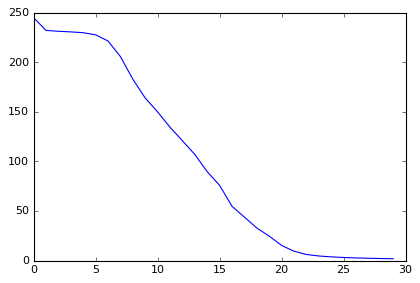

In [77]:
validate_homework()
# score_homework()

In [15]:
# Layer1 weights
W1 = np.random.uniform(low=-0.08, high=0.08, size=(784, 100)).astype('float32')
b1 = np.zeros(100).astype('float32')

# Layer2 weights
W2 = np.random.uniform(low=-0.08, high=0.08, size=(100,10)).astype('float32')
b2 = np.zeros(10).astype('float32')

In [32]:
t = 2

In [36]:
l = np.zeros(10)
l[t] = 1
l

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [19]:
def train(x, t, eps=1.0):
    global W1, b1, W2, b2 # to access variables that defined outside of this function.
    
    y_tmp = np.zeros(10).reshape(1, 10)
    y_tmp[0,t] = 1.0
    t=y_tmp
    # Forward Propagation Layer1
    u1 = np.matmul(x, W1) + b1
    z1 = sigmoid(u1)
    
    # Forward Propagation Layer2
    u2 = np.matmul(z1, W2) + b2
    z2 = softmax(u2)
    
    # Back Propagation (Cost Function: Negative Loglikelihood)
#     y = z2
#     t = (np.zeros(10)[t] = 1)
#     t[]
    
    cost = cross_entropy_error(y,t)
#     cost = np.sum(-t*np.log(y) - (1 - t)*np.log(1 - y))
    delta_2 = y - t # Layer2 delta
    delta_1 = deriv_sigmoid(u1) * np.matmul(delta_2, W2.T) # Layer1 delta
#     from IPython.core.debugger import Pdb; Pdb().set_trace()
    # Update Parameters Layer1
    dW1 = np.matmul(x.T, delta_1)
    db1 = np.matmul(np.ones(len(x)), delta_1)
    W1 = W1 - eps*dW1
    b1 = b1 - eps*db1
    
    # Update Parameters Layer2
    dW2 = np.matmul(z1.T, delta_2)
    db2 = np.matmul(np.ones(len(z1)), delta_2)
    W2 = W2 - eps*dW2
    b2 = b2 - eps*db2

    return cost

def test(x, t):

    # Forward Propagation Layer1
    u1 = np.matmul(x, W1) + b1
    z1 = sigmoid(u1)
    
    # Forward Propagation Layer2
    u2 = np.matmul(z1, W2) + b2
    z2 = softmax(u2)
    
    y = argmax(z2, axis = 1)
    
#     cost = -np.sum(l*log(y))
    return y
#     return cost, y

In [21]:
def train(x, t, eps=0.2):
    global W1, b1, W2, b2  # to access variables that defined outside of this function.

    y_tmp = np.zeros(10).reshape(1, 10)
    y_tmp[0,t] = 1.0
    train_y=y_tmp
    # Forward Propagation Layer1
    u1 = np.matmul(x, W1) + b1
    z1 = sigmoid(u1)

    # Forward Propagation Layer2
    u2 = np.matmul(z1, W2) + b2
    z2 = softmax(u2)

    # Back Propagation (Cost Function: Negative Loglikelihood)
    y = z2
    # cost = np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
    cost = -np.log(y[0,t])
    
    delta_2 = (y-train_y)
    delta_1 = deriv_sigmoid(u1) * np.matmul(delta_2, W2.T)  # Layer1 delta

    # Update Parameters Layer1
    dW1 = np.matmul(x.T, delta_1)
    db1 = np.matmul(np.ones(len(x)), delta_1)
    W1 = W1 - eps * dW1
    b1 = b1 - eps * db1

    # Update Parameters Layer2
    dW2 = np.matmul(z1.T, delta_2)
    db2 = np.matmul(np.ones(len(z1)), delta_2)
    W2 = W2 - eps * dW2
    b2 = b2 - eps * db2

    return cost

In [22]:
# Epoch
cost_array = []
cost_sum = []
for epoch in range(100):
    # Online Learning
    for x, y in zip(train_X, train_y):
        x = x[np.newaxis, :]
        y = y[np.newaxis, :]
        cost = train(x, y)
        cost_sum = np.append(cost_sum, cost)
    pred_y = test(test_X, test_y)
    cost = np.sum(cost_sum)
    cost_array = np.append(cost_array, cost)

print(cost)
print(pred_y)


NameError: name 'train_X' is not defined